# Feature Engineering

Here we will perform the final steps to get our data ready for modeling, split our data into train and test portions, and create our baseline model.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/cleaned_data.csv')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,yr_sold,yr_since_renovation,yr_since_built,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,2014,59.0,59,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,2014,23.0,63,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2015,82.0,82,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,2014,49.0,49,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,2015,28.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,47.6993,-122.346,2014,5.0,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,47.5107,-122.362,2015,1.0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,47.5944,-122.299,2014,5.0,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0.0,98027,47.5345,-122.069,2015,11.0,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             21597 non-null float64
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_basement          21597 non-null float64
yr_built               21597 non-null int64
yr_renovated           21597 non-null float64
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
yr_sold                21597 non-null int64
yr_since_renovation    21597 non-null float64
yr_since_built         21597 non-null int64
renovated              21597 non-null int64
dtypes: float64(9), int64(10)
memory 

In [4]:
df.isna().sum()

price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
condition              0
grade                  0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
yr_sold                0
yr_since_renovation    0
yr_since_built         0
renovated              0
dtype: int64

We have verified that our data has no nan values, and all data types are integers. However, we want to create dummy variables for those categories we've deemed categorical: 'floors', 'condition', 'grade', and 'zipcode'. The Pandas get_dummies function works on object datatypes, so we turn those columns into strings before running it.

In [5]:
categoricals = ['floors', 'condition', 'grade', 'zipcode']
df = df.astype({col: 'str' for col in categoricals})
df = pd.get_dummies(df, drop_first=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,0.0,0.0,1955,0.0,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,0.0,400.0,1951,1991.0,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,0.0,0.0,1933,0.0,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,0.0,910.0,1965,0.0,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,0.0,0.0,1987,0.0,47.6168,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,0.0,0.0,2009,0.0,47.6993,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,2310,5813,0.0,0.0,2014,0.0,47.5107,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,1020,1350,0.0,0.0,2009,0.0,47.5944,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,3,2.50,1600,2388,0.0,0.0,2004,0.0,47.5345,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 103 entries, price to zipcode_98199
dtypes: float64(8), int64(7), uint8(88)
memory usage: 4.3 MB


Many punctuation marks won't work as column names with the statsmodel linear regression modeling, so we remove or replace them.

In [7]:
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
subs = [(' ', '_'),('.',''),(',',''),("'",""),('™', ''), ('®',''),('+','plus'), ('½','half'), ('-','_')]
df.columns = [col_formatting(col) for col in df.columns]

# Train-Test Split

We declare our train and test sets before running any modeling, using sklearn's train_test_split function. We keep its default of 25% of the data for the test set, and set a random state for repeatability. The data will also be saved to csv so they can be read later.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train, test = train_test_split(df, random_state=7)

In [10]:
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
15200,175000.0,3,1.00,1070,6164,0.0,0.0,1967,0.0,47.3377,...,0,0,0,0,0,0,0,0,0,0
20737,775000.0,4,2.50,2580,5787,0.0,0.0,2007,0.0,47.5416,...,0,0,0,0,0,0,0,0,0,0
19361,440000.0,4,2.50,2350,7203,0.0,0.0,1989,0.0,47.5123,...,0,0,0,0,0,0,0,0,0,0
15578,1680000.0,5,5.25,4830,18707,0.0,900.0,1952,1998.0,47.5858,...,0,0,0,0,0,0,0,0,0,0
8436,2140000.0,4,3.75,5150,453895,0.0,790.0,1997,0.0,47.6795,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,250000.0,3,2.00,1440,9220,0.0,0.0,1965,0.0,47.3702,...,0,0,0,0,0,0,0,0,1,0
20691,380000.0,5,3.50,2420,4670,0.0,0.0,2013,0.0,47.5241,...,0,0,0,0,0,0,0,0,0,0
5699,276500.0,4,1.75,1400,6650,0.0,0.0,1942,0.0,47.4888,...,0,0,0,0,1,0,0,0,0,0
10742,440000.0,4,2.75,2340,11034,0.0,620.0,1967,0.0,47.7686,...,0,0,1,0,0,0,0,0,0,0


In [11]:
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
5460,560000.0,4,2.75,1950,6192,0.0,0.0,1992,0.0,47.5698,...,0,0,0,0,0,0,0,0,0,0
7131,500000.0,5,3.00,2920,11440,0.0,0.0,2003,0.0,47.7607,...,0,0,0,0,0,0,0,0,0,0
8759,470000.0,2,1.00,1220,4000,0.0,0.0,1908,0.0,47.6801,...,0,0,0,0,0,0,0,0,0,0
14957,1020000.0,4,3.00,2720,4800,0.0,930.0,1928,0.0,47.6595,...,0,0,0,0,0,0,0,0,0,0
5431,375000.0,3,2.50,1930,6180,0.0,600.0,1961,0.0,47.7481,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,1850000.0,4,3.25,4160,10335,0.0,0.0,2014,0.0,47.6235,...,0,0,0,0,0,0,0,0,0,0
7714,249900.0,3,1.00,1100,5000,0.0,0.0,1960,0.0,47.5433,...,0,0,0,0,0,0,0,0,0,0
2480,679000.0,4,1.50,1420,4923,0.0,0.0,1928,0.0,47.6901,...,0,0,0,0,0,0,0,0,0,0
16033,300000.0,3,1.75,1700,8481,0.0,0.0,1993,0.0,47.2623,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

# Baseline Model

To create our baseline model, we will run our train set as is through the statsmodel linear regression function. We will then collect some metrics from the model using the test data.

In [13]:
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [14]:
predictors = '+'.join(df.columns[1:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     730.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:30:04   Log-Likelihood:            -2.1678e+05
No. Observations:               16197   AIC:                         4.338e+05
Df Residuals:                   16095   BIC:                         4.345e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.703e+07   8.78e+06    -11.047      0.000   -1.14e+08   -7.98e+07
bedrooms            -1.578e+04   1757.584     -8.979      0.000   -1.92e+04   -1.23e+04
bathrooms            2.526e+04   3003.631      8.410      0.000    1.94e+04    3.11e+04
sqft_living           179.5396      3.341     53.732      0.000     172.990     186.089
sqft_lot                0.1756      0.036      4.846      0.000       0.105       0.247
waterfront           8.221e+05   1.58e+04     51.979      0.000    7.91e+05    8.53e+05
sqft_basement         -40.8133      4.160     -9.810      0.000     -48.968     -32.658
yr_built             9961.9354    894.649     11.135      0.000    8208.324    1.17e+04
yr_renovated         2740.6516    468.765      5.847      0.000    1821.819    3659.484
lat                  1.672e+05    7.2e+04      2.321      0.020     2.6e+04    3.08e+05
long                 -2.29e+05   5.15e+04     -4.448      0.000    -3.3e+05   -1.28e+05
yr_sold              2.041e+04   1780.689     11.463      0.000    1.69e+04    2.39e+04
yr_since_renovation    38.0446    320.548      0.119      0.906    -590.265     666.354
yr_since_built       1.045e+04    914.057     11.432      0.000    8658.003    1.22e+04
renovated           -5.404e+06   9.28e+05     -5.823      0.000   -7.22e+06   -3.58e+06
floors_15           -1.053e+04   5003.847     -2.104      0.035   -2.03e+04    -720.145
floors_20           -2.925e+04   4211.716     -6.945      0.000   -3.75e+04    -2.1e+04
floors_25            3.273e+04   1.57e+04      2.089      0.037    2024.261    6.34e+04
floors_30           -6.063e+04   9464.315     -6.406      0.000   -7.92e+04   -4.21e+04
floors_35           -6034.5935   6.48e+04     -0.093      0.926   -1.33e+05    1.21e+05
condition_2          8.145e+04   3.99e+04      2.041      0.041    3231.439     1.6e+05
condition_3          9.346e+04   3.76e+04      2.486      0.013    1.98e+04    1.67e+05
condition_4          1.204e+05   3.76e+04      3.201      0.001    4.67e+04    1.94e+05
condition_5           1.58e+05   3.78e+04      4.181      0.000    8.39e+04    2.32e+05
grade_11             2.032e+05   1.08e+04     18.888      0.000    1.82e+05    2.24e+05
grade_12             6.403e+05   2.09e+04     30.668      0.000    5.99e+05    6.81e+05
grade_13             1.814e+06   5.18e+04     35.033      0.000    1.71e+06    1.92e+06
grade_3             -1.363e+05   1.59e+05     -0.860      0.390   -4.47e+05    1.74e+05
grade_4             -2.074e+05    3.6e+04     -5.761      0.000   -2.78e+05   -1.37e+05
grade_5              -2.46e+05   1.56e+04    -15.804      0.000   -2.77e+05   -2.16e+05
grade_6             -2.509e+05   9535.386    -26.312      0.000    -2.7e+05   -2.32e+05
grade_7             -2.435e+05   7805.003    -31.192      0.000   -2.59e+05   -2.28e+05
gra

In [15]:
train_r2, train_r2_adj = model.rsquared, model.rsquared_adj
train_r2, train_r2_adj

(0.8208200222124922, 0.8196956247128626)

In [16]:
y_hat_train = model.predict(train.drop('price', axis=1))
y_train = train['price']
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
train_rmse

157156.21796974784

In [17]:
y_hat_test = model.predict(test.drop('price', axis=1))
y_test = test['price']
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
test_rmse

139700.57671817578

In [18]:
pvalues = model.pvalues.to_dict()
significant_items = {}
for key, value in pvalues.items():
    if value < 0.05:
        significant_items[key] = value
len(significant_items), len(pvalues)

(81, 103)

Baseline model:
- R2 of 0.821
- adjusted R2 of 0.820
- Train RMSE of 157156
- Test RMSE of 139700
- 81 significant features (p-value < 0.05)
- 103 features total

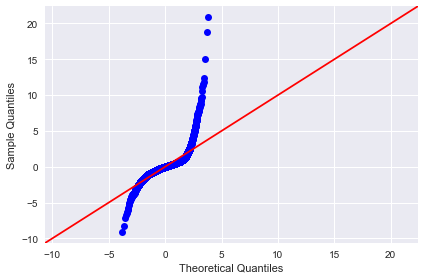

In [19]:
import statsmodels.api as sm
import scipy.stats as stats
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout()
plt.savefig('figures/baseline-qq-plot.png')
plt.show()

Our metrics of our baseline model shows we have some problems. Our R2 isn't too bad, but with such a huge number of features, it doesn't mean much. Our RMSE values are high, and our QQ plot shows our data seems to have fat tails, although it doesn't seem to have much skew.